# **'커피지수'로 본 경제발전정도**

- [데이터 출처](https://www.data.go.kr/dataset/15012005/fileData.do)
- 커피 프렌차이즈 중 전국에 가장많은 점포수를 갖고 있는 **이디야를 분모**로 사용
- 커피지수 : (스타벅수 점포수 + 커피빈 점포수 + 빽다방 점포수) / 이디야 점포수  

In [770]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns
import folium

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'  # https://github.com/limwonki0619/Python-lecture/blob/master/Python-Data-Science/Matplotlib/Matplotlib%20%EC%99%B8%EB%B6%80%ED%8F%B0%ED%8A%B8%20%EC%A0%81%EC%9A%A9%EB%B0%A9%EB%B2%95.ipynb
font_family = fm.FontProperties(fname=font_fname).get_name() 
plt.rcParams['font.family'] = font_family

%matplotlib inline

In [96]:
# folderpath = r'C:\Users\limwk\Desktop\소상공인시장진흥공단_상가업소정보_201906'
folderpath = r'C:\Users\709-000\Desktop\소상공인시장진흥공단_상가업소정보_201906'

shop_2019_1 = pd.read_csv(folderpath+"/소상공인시장진흥공단_상가업소정보_201906_01.csv", encoding='utf-8')

In [97]:
shop_2019_1.head()  # 데이터 확인 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [98]:
shop_2019_1.shape # 행, 열 갯수 확인

(565016, 39)

In [99]:
shop_2019_1.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [100]:
coffee_1 = shop_2019_1[shop_2019_1['상권업종소분류명'].str.contains('커피')]
coffee_1.shape  # 2019년 6월 기준 전국 커피/카페 점포수

(23103, 39)

- 전반적인 데이터를 확인했으므로 전체 데이터를 합쳐보자.

In [101]:
shop_2019_2 = pd.read_csv(folderpath+"/소상공인시장진흥공단_상가업소정보_201906_02.csv", encoding='utf-8')
shop_2019_3 = pd.read_csv(folderpath+"/소상공인시장진흥공단_상가업소정보_201906_03.csv", encoding='utf-8')
shop_2019_4 = pd.read_csv(folderpath+"/소상공인시장진흥공단_상가업소정보_201906_04.csv", encoding='utf-8')

# 경고 메세지 무시

C:\AN\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\AN\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
# 데이터를 정상적으로 불렀는지 확인
print(shop_2019_2.shape)
print(shop_2019_3.shape)
print(shop_2019_4.shape)

(520497, 39)
(857672, 39)
(758611, 39)


In [103]:
shop_2019 = pd.concat([shop_2019_1, shop_2019_2, shop_2019_3, shop_2019_4], axis=0)
shop_2019.shape  # 행으로 데이터를 연결하고, 데이터 행 열 갯수 확인

(2701796, 39)

In [104]:
coffee = shop_2019[shop_2019['상권업종소분류명'].str.contains('커피')]
coffee.shape

(93253, 39)

In [105]:
coffee = coffee[['시도명', '시군구명', '상호명', '지점명', '경도', '위도', '도로명주소']]  # 필요한 컬럼만 가져오기 

In [106]:
coffee.shape  # 확인 

(93253, 7)

In [110]:
# 모든 커피점 정보를 전처리한 파일 저장

coffee.to_csv('data/2019_korea_coffee_shop.csv', header=True, index=False, encoding='euc-kr')

In [111]:
# 저장된 데이터가 잘 불려지는지 확인 
coffee = pd.read_csv('data/2019_korea_coffee_shop.csv', encoding='euc-kr')
coffee.shape

(93253, 7)

## **스타벅스 전처리**

In [138]:
starbucks = coffee[coffee['상호명'].str.contains('스타벅스')]
starbucks = starbucks.reset_index().drop('index', axis=1)  # 인덱스 재지정 및 기존 인덱스 삭제
starbucks.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,용산구,스타벅스,이태원점,126.994781,37.534303,서울특별시 용산구 이태원로 188
1,서울특별시,종로구,스타벅스종로3가점,종로3가점,126.990207,37.570585,서울특별시 종로구 종로 113-1
2,서울특별시,서초구,스타벅스,신사2점,127.019763,37.513663,서울특별시 서초구 강남대로 581
3,서울특별시,영등포구,스타벅스커피여의도IFC1F,NaN,126.924863,37.525172,서울특별시 영등포구 국제금융로 10
4,서울특별시,강남구,스타벅스,삼성역점,127.063878,37.510038,서울특별시 강남구 테헤란로103길 9


- 전국 스타벅스 매장수 

In [139]:
starbucks['상호명'].count()  # 상호명에 '스타벅스'가 들어가지만, 스타벅스 지점이 아닌경우가 있을 수 있다. 다만, 여기서는 생략

1433

- 지점명을 `~ 점`으로 정리

In [140]:
starbucks['지점명'] = starbucks['지점명'].fillna('-')  # 지점명이 NaN인 경우 인덱싱이 불가능, 따라서 아무 문자열로 변경 

In [141]:
# 지점명을 ~점으로 나타내기위한 방법 (판다스 연습용)

for index, i in enumerate(starbucks['상호명']):  # 0번 컬럼 : 시도명, 3번 컬럼 : 지점명
    if starbucks.iloc[index, 2] != '스타벅스':
        if i[-1] == '점':
            starbucks.iloc[index, 3] = i[4:]
        else:
            starbucks.iloc[index, 3] = i[4:] + '점'
    elif starbucks.iloc[index, 2] == '스타벅스' and starbucks.iloc[index, 3][-1] == '점':
        starbucks.iloc[index, 3] = starbucks.iloc[index, 3]
    else:
        starbucks.iloc[index, 3] = starbucks.iloc[index, 3] + '점'

In [142]:
starbucks.head(10)

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,용산구,스타벅스,이태원점,126.994781,37.534303,서울특별시 용산구 이태원로 188
1,서울특별시,종로구,스타벅스종로3가점,종로3가점,126.990207,37.570585,서울특별시 종로구 종로 113-1
2,서울특별시,서초구,스타벅스,신사2점,127.019763,37.513663,서울특별시 서초구 강남대로 581
3,서울특별시,영등포구,스타벅스커피여의도IFC1F,커피여의도IFC1F점,126.924863,37.525172,서울특별시 영등포구 국제금융로 10
4,서울특별시,강남구,스타벅스,삼성역점,127.063878,37.510038,서울특별시 강남구 테헤란로103길 9
5,서울특별시,관악구,스타벅스,신림포도몰점,126.930216,37.483845,서울특별시 관악구 신림로 330
6,서울특별시,관악구,스타벅스신림사거리점,신림사거리점,126.930487,37.484631,서울특별시 관악구 남부순환로 1619
7,서울특별시,강동구,스타벅스,-점,127.127021,37.538788,서울특별시 강동구 천호대로157길 19
8,서울특별시,마포구,스타벅스커피홍대역,커피홍대역점,126.923599,37.557202,서울특별시 마포구 양화로 165
9,서울특별시,강남구,스타벅스,신사역점,127.020635,37.516184,서울특별시 강남구 도산대로 108


- 스타벅스의 ID 생성

In [427]:
def GetNoneList(data):
    """
    데이터프레임의 행 갯수만큼 빈 리스트를 만드는 함수
    """
    global si_name  # 전역변수로 설정이 중요 
    si_name = [None] * len(data)

In [124]:
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
               '성남':['수정구', '중원구', '분당구'], 
               '안양':['만안구', '동안구'], 
               '안산':['상록구', '단원구'], 
               '고양':['덕양구', '일산동구', '일산서구'], 
               '용인':['처인구', '기흥구', '수지구'], 
               '청주':['상당구', '서원구', '흥덕구', '청원구'], 
               '천안':['동남구', '서북구'], 
               '전주':['완산구', '덕진구'], 
               '포항':['남구', '북구'], 
               '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
               '부천':['오정구', '원미구', '소사구']}

In [143]:
def GetID(df):
    for n in df.index:
        if df['시도명'][n][-3:] not in ['광역시', '특별시', '자치시']:  # 광역시도 열에서 뒷 세자리가 '광역시', '특별시', '자치시' 가 아니면,
        
            # 같은 '시도' 이름을 가지는 고성 지역 처리
            if df['시군구명'][n].strip()[:-1]=='고성' and df['시도명'][n]=='강원도':  # '시도'가 고성이면서, '광역시도'가 강원도인 지역 처리
                si_name[n] = '고성(강원)'
            elif df['시군구명'][n].strip()[:-1]=='고성' and df['시도명'][n]=='경상남도':  # '시도'가 고성이면서, '광역시도가' 경남인 지역 처리
                si_name[n] = '고성(경남)'
            else:
                si_name[n] = df['시군구명'][n].strip()[:-1]  # 나머지 지역은 맨 뒤의 '구' 삭제 
        
            # 광역시가 아니면서 구를 가지고 있는 시 처리 
            for keys, values in tmp_gu_dict.items():
                if len(df['시군구명'][n]) >= 5 and df['시군구명'][n].strip()[:2] in keys:
                    if len(df['시군구명'][n].split()[1]) == 2:
                        si_name[n] = keys + ' ' + df['시군구명'][n].split()[1]
                    elif df['시군구명'][n] in ['마산합포구','마산회원구']:  # 마산합포와 회원구는 '합포', '회원'만 출력
                        si_name[n] = keys + ' ' + df['시군구명'][n].strip()[2:-1]
                    else:
                        si_name[n] = keys + ' ' + df['시군구명'][n].strip()[4:-1]  # 이름이 3자 이상이면, 맨 뒤의 '구' 삭제  
        
        elif df['시도명'][n] == '세종특별자치시':  # 세종자치시의 경우는 세종으로
            si_name[n] = '세종'
        
        else:  # tmp_gi_dict와 세종을 제외한 나머지 지역 처리 
            if len(df['시군구명'][n].strip()) >= 3:
                si_name[n] = df['시도명'][n][:2] + ' ' + df['시군구명'][n].strip()[:-1]
            else:
                si_name[n] = df['시도명'][n][:2] + ' ' + df['시군구명'][n].strip()
        
        print(si_name[n], n)

In [353]:
GetNoneList(starbucks)  # 빈리스트 호출 

In [356]:
# GetID(starbucks)  # ID 생성 

- 'ID', '스타벅스 매장수', '브랜드명' 추가

In [145]:
starbucks['ID'] = si_name
starbucks['스타벅스 매장수'] = 1
starbucks['브랜드명'] = '스타벅스'
starbucks.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,스타벅스 매장수,브랜드명
0,서울특별시,용산구,스타벅스,이태원점,126.994781,37.534303,서울특별시 용산구 이태원로 188,서울 용산,1,스타벅스
1,서울특별시,종로구,스타벅스종로3가점,종로3가점,126.990207,37.570585,서울특별시 종로구 종로 113-1,서울 종로,1,스타벅스
2,서울특별시,서초구,스타벅스,신사2점,127.019763,37.513663,서울특별시 서초구 강남대로 581,서울 서초,1,스타벅스
3,서울특별시,영등포구,스타벅스커피여의도IFC1F,커피여의도IFC1F점,126.924863,37.525172,서울특별시 영등포구 국제금융로 10,서울 영등포,1,스타벅스
4,서울특별시,강남구,스타벅스,삼성역점,127.063878,37.510038,서울특별시 강남구 테헤란로103길 9,서울 강남,1,스타벅스


- 스타벅스 전처리 데이터프레임 저장

In [146]:
starbucks.to_csv('data/starbucks.csv', encoding='euc-kr')  # 데이터 저장 

In [147]:
starbucks = pd.read_csv('data/starbucks.csv', encoding = 'euc-kr', index_col=0)
starbucks.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,스타벅스 매장수,브랜드명
0,서울특별시,용산구,스타벅스,이태원점,126.994781,37.534303,서울특별시 용산구 이태원로 188,서울 용산,1,스타벅스
1,서울특별시,종로구,스타벅스종로3가점,종로3가점,126.990207,37.570585,서울특별시 종로구 종로 113-1,서울 종로,1,스타벅스
2,서울특별시,서초구,스타벅스,신사2점,127.019763,37.513663,서울특별시 서초구 강남대로 581,서울 서초,1,스타벅스
3,서울특별시,영등포구,스타벅스커피여의도IFC1F,커피여의도IFC1F점,126.924863,37.525172,서울특별시 영등포구 국제금융로 10,서울 영등포,1,스타벅스
4,서울특별시,강남구,스타벅스,삼성역점,127.063878,37.510038,서울특별시 강남구 테헤란로103길 9,서울 강남,1,스타벅스


## **커피빈 전처리**

In [447]:
bean = coffee[coffee['상호명'].str.contains('커피빈')]

In [448]:
bean = bean.reset_index().drop('index', axis=1)  # 인덱스 재지정 및 기존 인덱스 삭제
bean.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,강남구,커피빈코리아선릉로93길점,코리아선릉로93길점,127.047883,37.505675,서울특별시 강남구 선릉로93길 6
1,서울특별시,서초구,커피빈,코리아교대점,127.014217,37.492388,서울특별시 서초구 서초중앙로 118
2,서울특별시,종로구,커피빈,코리아대학로대명거리점,127.000171,37.583149,서울특별시 종로구 대명길 25
3,서울특별시,강남구,커피빈,코리아선릉역점,127.048223,37.504750,서울특별시 강남구 테헤란로 335
4,서울특별시,영등포구,커피빈,코리아현대자동차여의도점,126.927277,37.524879,서울특별시 영등포구 국제금융로 20


In [449]:
bean['상호명'].count()  # 상호명에 '커피빈'이 들어가지만, 스타벅스 지점이 아닌경우가 있을 수 있다. 다만, 여기서는 생략

374

In [451]:
bean['지점명'] = bean['지점명'].fillna('-')

In [452]:
for index, store_name in enumerate(bean['지점명']):  # 2 : 상호명, 3 : 지점명
    if store_name[-1] != '점' and store_name[-1] != '-':
        print(bean.iloc[index, 2], bean.iloc[index, 3], index)
        

커피빈 올림픽공원북2문앞 166
커피빈 미스리 234
커피빈 미스리 238
커피빈 별나라 239
커피빈 곰씨네 347
커피빈 CAFFE 348
커피빈함안휴게소순천방면 함안휴게소순천방면 365
커피빈함안휴게소부산방면 함안휴게소부산방면 366


- `isin` :  원하는 값이 있는지 bool 형태로 반환, 사용 예 : something.isin(somewhere)
- `isnotin`이라는 함수는 없지만,  `~`로 isin의 결과를 뒤집을 수 있음, 사용 예 : ~something.isin(somewhere)

In [461]:
# 지점명이 미스리, 별나라, 곰씨네, caffe인 지점은 커피빈의 점포가 아니라고 판단되어 삭제

bean = bean[~bean['지점명'].isin(['미스리', '별나라', '곰씨네', 'CAFFE'])]  # 행 삭제시 인덱스 정리가 필요하다.
bean = bean.reset_index().drop('index', axis=1)

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,강남구,커피빈코리아선릉로93길점,코리아선릉로93길점,127.047883,37.505675,서울특별시 강남구 선릉로93길 6
1,서울특별시,서초구,커피빈,코리아교대점,127.014217,37.492388,서울특별시 서초구 서초중앙로 118
2,서울특별시,종로구,커피빈,코리아대학로대명거리점,127.000171,37.583149,서울특별시 종로구 대명길 25
3,서울특별시,강남구,커피빈,코리아선릉역점,127.048223,37.504750,서울특별시 강남구 테헤란로 335
4,서울특별시,영등포구,커피빈,코리아현대자동차여의도점,126.927277,37.524879,서울특별시 영등포구 국제금융로 20


- 커피빈 데이터의 ID 생성

In [462]:
GetNoneList(bean)

In [466]:
# GetID(bean)

In [467]:
bean['ID'] = si_name
bean['커피빈 매장수'] = 1
bean['브랜드명'] = '커피빈'
bean.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,커피빈 매장수,브랜드명
0,서울특별시,강남구,커피빈코리아선릉로93길점,코리아선릉로93길점,127.047883,37.505675,서울특별시 강남구 선릉로93길 6,서울 강남,1,커피빈
1,서울특별시,서초구,커피빈,코리아교대점,127.014217,37.492388,서울특별시 서초구 서초중앙로 118,서울 서초,1,커피빈
2,서울특별시,종로구,커피빈,코리아대학로대명거리점,127.000171,37.583149,서울특별시 종로구 대명길 25,서울 종로,1,커피빈
3,서울특별시,강남구,커피빈,코리아선릉역점,127.048223,37.504750,서울특별시 강남구 테헤란로 335,서울 강남,1,커피빈
4,서울특별시,영등포구,커피빈,코리아현대자동차여의도점,126.927277,37.524879,서울특별시 영등포구 국제금융로 20,서울 영등포,1,커피빈


In [469]:
bean.tail()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,커피빈 매장수,브랜드명
364,전라북도,전주시 완산구,커피빈,-,127.088097,35.815308,전라북도 전주시 완산구 속거길 11-8,전주 완산,1,커피빈
365,경상남도,창원시 진해구,커피빈,-,128.806785,35.100435,경상남도 창원시 진해구 안청남로 40,창원 진해,1,커피빈
366,전라남도,여수시,커피빈,-,127.702682,34.771724,전라남도 여수시 대학로 18-1,여수,1,커피빈
367,전라북도,군산시,커피빈,-,126.718340,35.979542,전라북도 군산시 미원로 126-6,군산,1,커피빈
368,경상북도,울진군,커피빈,-,129.421066,37.060126,경상북도 울진군 죽변면 죽변9길 1,울진,1,커피빈


In [470]:
bean.to_csv('data/bean.csv', encoding='euc-kr')

In [471]:
bean = pd.read_csv('data/bean.csv', encoding='euc-kr', index_col = 0)

## **이디야 전처리**

In [498]:
ediya = coffee[coffee['상호명'].str.contains('이디야')]

In [499]:
ediya = ediya.reset_index().drop('index', axis=1)  # 인덱스 재지정 및 기존 인덱스 삭제
ediya.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,영등포구,이디야커피,신길역점,126.918062,37.515118,서울특별시 영등포구 영등포로 353
1,부산광역시,사하구,이디야커피,부산다대포점,128.966690,35.048200,부산광역시 사하구 다대로 682
2,서울특별시,구로구,이디야커피,이마트구로점,126.897870,37.484385,서울특별시 구로구 디지털로32길 43
3,서울특별시,노원구,이디야커피,중계롯데우성점,127.072754,37.646364,서울특별시 노원구 노원로22길 34
4,서울특별시,성동구,이디야커피,금호역점,127.017791,37.548427,서울특별시 성동구 장터길 17-1


In [501]:
ediya['상호명'].unique()[:30]

array(['이디야커피', '이디야IBK고객센터', '이디야서대문점2호', '이디야커피전농뉴타운점', '이디야커피숍',
       '이디야커피이대역점', '이디야커피자양동점', '이디야커피은행나무사거리점', '이디야커피마포KCC점',
       '이디야커피천호현대점', '이디야커피연구소', '이디야커피동소문동점', '이디야커피전문점', '이디야커피세광교회점',
       '이디야커피신림미성점', '이디야마들역', '이디야커피봉천역점', '이디야커피보수점', '이디야커피신도림테크노마트',
       '이디야커피점', '이디야역삼플래티넘', '이디야커피망우점', '부일이디야커피', '이디야커피마곡수명산점',
       '이디야커피애오개역점', '이디야커피청계천점', '이디야커피자양사거리점', '이디야커피용두점', '이디야에스프레소',
       '이디야커피경희대점'], dtype=object)

In [502]:
ediya['지점명'] = ediya['지점명'].fillna('-')

In [503]:
for index, store_name in enumerate(ediya['지점명']):  # 2 : 상호명, 3 : 지점명
    if store_name[-1] != '점' and store_name[-1] != '-':
        print(ediya.iloc[index, 2], ediya.iloc[index, 3], index)

이디야커피 이마트용산역 167
이디야커피 별관 346
이디야커피 에스프레소 615
이디야커피 부산가야홈플러스 642
이디야커피 도림사거리 643
이디야커피 대전노은3동 703
이디야커피 구월동길동병원 792
이디야커피 에스프레소 1530
이디야커피 에스프레소 1604
이디야커피 HEPBURN 1605


In [504]:
GetNoneList(ediya)

In [506]:
# GetID(ediya)

In [507]:
ediya['ID'] = si_name
ediya['이디야 매장수'] = 1
ediya['브랜드명'] = '이디야'

In [508]:
ediya.tail()  # ID가 잘 생성되었는지 확인

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,이디야 매장수,브랜드명
2024,경상남도,김해시,이디야커피,김해시청점,128.886935,35.228217,경상남도 김해시 호계로422번길 16,김해,1,이디야
2025,경상북도,울진군,이디야커피,울진군청점,129.401641,36.994876,경상북도 울진군 울진읍 읍내8길 5,울진,1,이디야
2026,경상남도,김해시,이디야커피,진영캐스빌점,128.725701,35.312157,경상남도 김해시 진영읍 진산대로 63-31,김해,1,이디야
2027,경상북도,청도군,이디야커피,청도프로방스점,128.717151,35.688548,경상북도 청도군 화양읍 이슬미로 321,청도,1,이디야
2028,전라남도,여수시,이디야커피,여수대교동점,127.724434,34.735310,전라남도 여수시 대교로 30,여수,1,이디야


In [514]:
ediya.to_csv('data/ediya.csv', encoding='euc-kr')

## **빽다방 전처리**

In [517]:
paik = coffee[coffee['상호명'].str.contains('빽다방|백다방|paikdabang|PAIKDABANG')]
len(paik)

590

In [490]:
paik = paik.reset_index().drop('index', axis=1)
paik.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소
0,서울특별시,서초구,빽다방커피,NaN,127.015447,37.493461,서울특별시 서초구 서초중앙로22길 25
1,서울특별시,동대문구,빽다방외대역점,외대역점,127.062160,37.595777,서울특별시 동대문구 휘경로 17
2,서울특별시,광진구,빽다방,어린이대공원역점,127.072309,37.548093,서울특별시 광진구 광나루로 381-1
3,서울특별시,송파구,빽다방,오금역점,127.126105,37.502874,서울특별시 송파구 오금로 306
4,서울특별시,광진구,빽다방,건대역화양점,127.068602,37.542252,서울특별시 광진구 아차산로29길 29-1


In [491]:
paik['지점명'] = paik['지점명'].fillna('-')

In [494]:
for index, store_name in enumerate(paik['지점명']):  # 2 : 상호명, 3 : 지점명
    if store_name[-1] != '점' and store_name[-1] != '-':
        print(paik.iloc[index, 2], paik.iloc[index, 3], index)

빽다방 명지대 167
빽다방베이커리앤 베이커리앤 563


In [510]:
GetNoneList(paik)

In [516]:
# GetID(paik)

In [512]:
paik['ID'] = si_name
paik['빽다방 매장수'] = 1
paik['브랜드명'] = '빽다방'

In [513]:
paik.head()

,시도명,시군구명,상호명,지점명,경도,위도,도로명주소,ID,빽다방 매장수,브랜드명
0,서울특별시,서초구,빽다방커피,-,127.015447,37.493461,서울특별시 서초구 서초중앙로22길 25,서울 서초,1,빽다방
1,서울특별시,동대문구,빽다방외대역점,외대역점,127.062160,37.595777,서울특별시 동대문구 휘경로 17,서울 동대문,1,빽다방
2,서울특별시,광진구,빽다방,어린이대공원역점,127.072309,37.548093,서울특별시 광진구 광나루로 381-1,서울 광진,1,빽다방
3,서울특별시,송파구,빽다방,오금역점,127.126105,37.502874,서울특별시 송파구 오금로 306,서울 송파,1,빽다방
4,서울특별시,광진구,빽다방,건대역화양점,127.068602,37.542252,서울특별시 광진구 아차산로29길 29-1,서울 광진,1,빽다방


In [515]:
paik.to_csv('data/paik.csv', encoding='euc-kr')

## **카페 데이터 병합**

In [817]:
pd.read_csv('data/starbucks.csv', index_col = 0, encoding='euc-kr')
pd.read_csv('data/bean.csv', index_col = 0, encoding='euc-kr')
pd.read_csv('data/ediya.csv', index_col = 0, encoding='euc-kr')
pd.read_csv('data/paik.csv', index_col = 0, encoding='euc-kr')

print(starbucks.head(2))
print(bean.shape)
print(ediya.shape)
print(paik.shape)

     시도명 시군구명        상호명    지점명          경도         위도               도로명주소  \
0  서울특별시  용산구       스타벅스   이태원점  126.994781  37.534303  서울특별시 용산구 이태원로 188   
1  서울특별시  종로구  스타벅스종로3가점  종로3가점  126.990207  37.570585  서울특별시 종로구 종로 113-1   

      ID  스타벅스 매장수  브랜드명  
0  서울 용산         1  스타벅스  
1  서울 종로         1  스타벅스  
(369, 10)
(2029, 10)
(590, 10)


### **프렌차이즈별 피벗테이블 생성**

In [818]:
pt_starbucks = starbucks.pivot_table('스타벅스 매장수', index='ID', aggfunc='count')
pt_starbucks = pt_starbucks.reset_index()
pt_starbucks.tail()

,ID,스타벅스 매장수
180,하남,5
181,하동,1
182,함양,1
183,홍천,1
184,화성,12


In [819]:
pt_bean = bean.pivot_table('커피빈 매장수', index='ID', aggfunc='count')
pt_bean = pt_bean.reset_index()
pt_bean.tail()

,ID,커피빈 매장수
90,포항 북구,1
91,하남,1
92,함안,2
93,해남,1
94,화성,5


In [820]:
pt_ediya = ediya.pivot_table('이디야 매장수', index='ID', aggfunc='count')
pt_ediya = pt_ediya.reset_index()
pt_ediya.tail()

,ID,이디야 매장수
223,홍성,3
224,홍천,3
225,화성,23
226,화순,1
227,화천,2


In [821]:
pt_paik = paik.pivot_table('빽다방 매장수', index='ID', aggfunc='count')
pt_paik = pt_paik.reset_index()
pt_paik.tail()

,ID,빽다방 매장수
153,하남,1
154,함양,2
155,홍성,2
156,홍천,1
157,화성,13


- 이디야의 ID 값을 기준으로 데이터 전부 병합

In [626]:
merge_1 = pd.merge(pt_ediya, pt_starbucks, how='left', on='ID')
merge_2 = pd.merge(merge_1, pt_bean, how='left', on='ID')
merge_3 = pd.merge(merge_2, pt_paik, how='left', on='ID')

In [810]:
merge_3 = merge_3.fillna(0)  # NaN을 0으로 처리 
merge_3.head()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
0,가평,6,0.0,0.0,0.0,0.000000
1,강릉,7,3.0,0.0,2.0,0.714286
2,강진,1,0.0,0.0,0.0,0.000000
3,거제,8,4.0,0.0,2.0,0.750000
4,거창,1,0.0,0.0,2.0,2.000000


- 커피지수 계산 : (스타벅수 점포수 + 커피빈 점포수 + 빽다방 점포수) / 이디야 점포수 

In [630]:
merge_3['커피지수'] = merge_3.iloc[:, 2:].sum(axis=1) / merge_3['이디야 매장수']

In [822]:
merge_3.tail()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
223,홍성,3,0.0,0.0,2.0,0.666667
224,홍천,3,1.0,0.0,1.0,0.666667
225,화성,23,12.0,5.0,13.0,1.304348
226,화순,1,0.0,0.0,0.0,0.000000
227,화천,2,0.0,0.0,0.0,0.000000


### **카토그램 데이터와 커피 데이터 합치기**

In [809]:
draw_korea = pd.read_csv('data/05. draw_korea.csv', index_col = 0, encoding='utf-8')
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [799]:
cfix = pd.merge(draw_korea, merge_3, how='left', on='ID')  # ID값을 기준으로 left join 
cfix = cfix.fillna(0)
cfix.head(20)

,y,x,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
0,0,7,철원,2.0,0.0,0.0,0.0,0.000000
1,0,8,화천,2.0,0.0,0.0,0.0,0.000000
2,0,9,양구,1.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),1.0,2.0,0.0,0.0,2.000000
4,1,3,양주,14.0,3.0,0.0,0.0,0.214286
5,1,4,동두천,2.0,3.0,0.0,0.0,1.500000
6,1,5,연천,1.0,0.0,1.0,0.0,1.000000
7,1,6,포천,10.0,5.0,0.0,2.0,0.700000
8,1,7,의정부,21.0,9.0,0.0,4.0,0.619048
9,1,8,인제,3.0,1.0,0.0,0.0,0.333333


- 카토그램 생성 함수 

In [800]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'whitesmoke'  if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [801]:
BORDER_LINES = [ # 지역별 각 꼭짓점이 되는 좌표, [행][열] 구성 
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(9,13), (9,14), (8,14)],  #울릉 
    [(27,5), (27,6), (25,6)],  #제주 
]

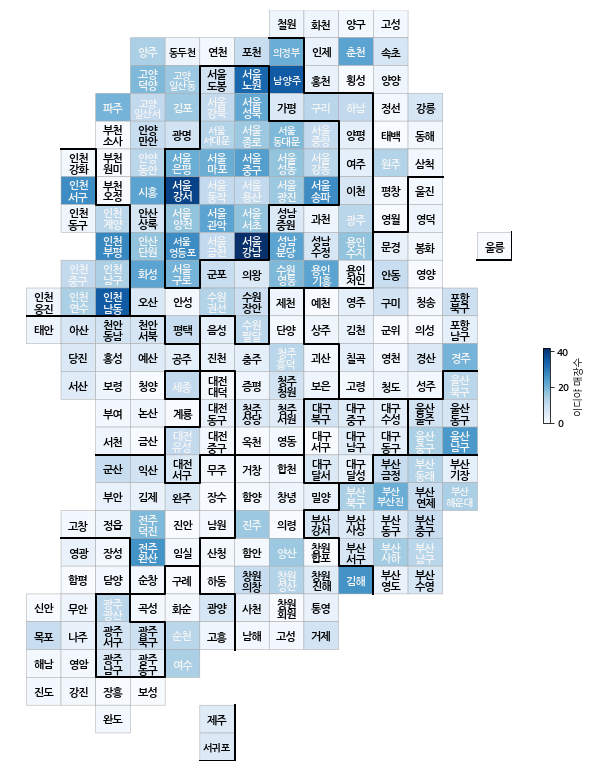

In [802]:
drawKorea('이디야 매장수', cfix, 'Blues')

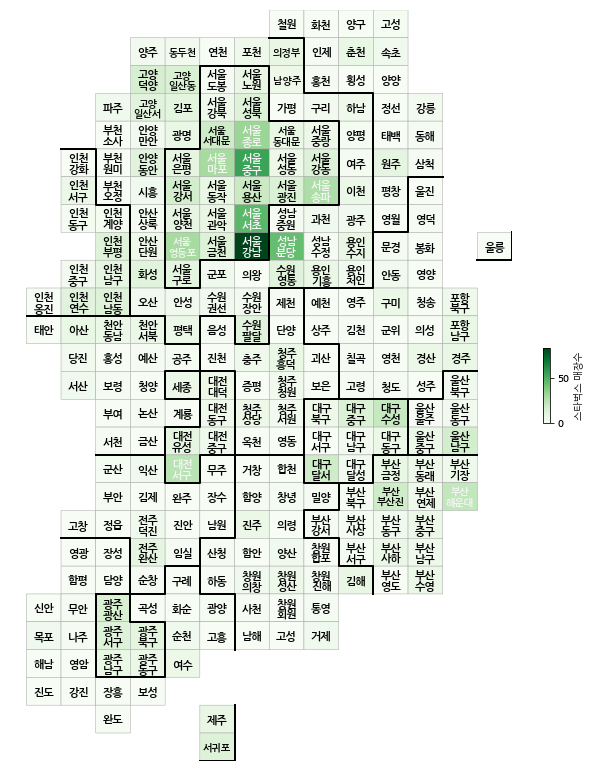

In [803]:
drawKorea('스타벅스 매장수', cfix, 'Greens')

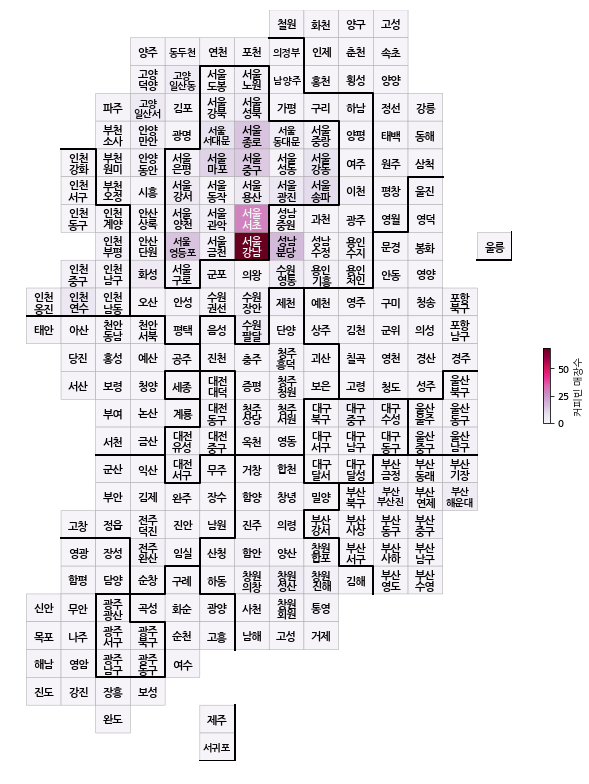

In [804]:
drawKorea('커피빈 매장수', cfix, 'PuRd')

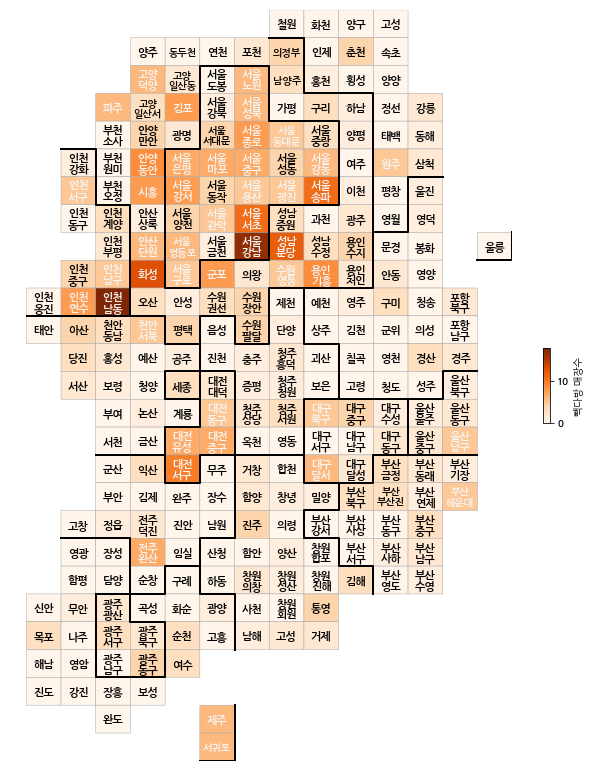

In [805]:
drawKorea('빽다방 매장수', cfix, 'Oranges')

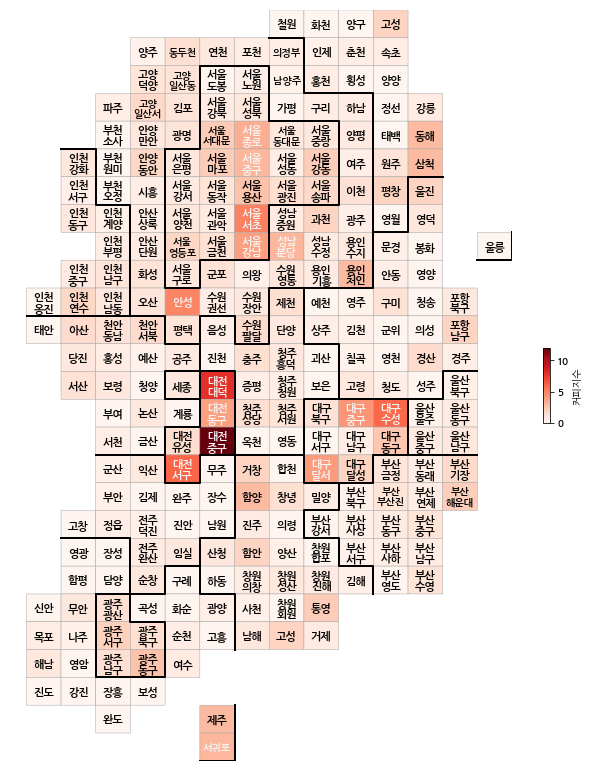

In [806]:
drawKorea('커피지수', cfix, 'Reds')

In [829]:
cfix[cfix['ID'].str.contains('대전 중구|대전 서구|대전 대덕|서울 강남')]

,y,x,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
77,8,6,서울 강남,42.0,84.0,69.0,17.0,4.047619
137,13,5,대전 대덕,1.0,6.0,0.0,2.0,8.000000
159,15,5,대전 중구,1.0,5.0,0.0,7.0,12.000000
169,16,4,대전 서구,6.0,25.0,2.0,10.0,6.166667
